# **STEP 1: Importing principal packages**

In [15]:
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# **STEP 2: Download data from Yahoo Finance**

In [16]:
etfs = ["VCN.TO", "XIC.TO", "BTCC-B.TO", "ETHH-B.TO"]
start_date = "2022-01-01"
end_date = datetime.today().strftime('%Y-%m-%d')
data = yf.download(etfs, start=start_date, end=end_date, group_by='ticker', auto_adjust=False)

[*********************100%***********************]  4 of 4 completed


In [18]:
# Create a DataFrame of Close prices only
close_prices = pd.DataFrame({ticker: data[(ticker, 'Close')] for ticker in etfs})
close_prices.to_csv('ETFs_close_prices_final.csv', index=True)

# **STEP 3: Aproach to the Dataset**

In [19]:
close_prices.describe()

,VCN.TO,XIC.TO,BTCC-B.TO,ETHH-B.TO
count,881.000000,881.000000,881.000000,881.000000
mean,44.086618,34.547435,9.603439,10.818093
std,4.591345,3.490779,5.515465,3.547133
min,36.770000,28.959999,3.090000,4.660000
25%,40.669998,31.940001,5.170000,7.865000
50%,42.560001,33.430000,7.670000,10.300000
75%,47.000000,36.740002,13.100000,13.410000
max,55.230000,43.130001,21.740000,19.850000


In [20]:
close_prices.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 881 entries, 2022-01-04 to 2025-07-07
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   VCN.TO     881 non-null    float64
 1   XIC.TO     881 non-null    float64
 2   BTCC-B.TO  881 non-null    float64
 3   ETHH-B.TO  881 non-null    float64
dtypes: float64(4)
memory usage: 34.4 KB


In [21]:
close_prices.shape

(881, 4)

# **STEP 4: Calculate KPIs for each ETF & Analysis**

# # 1. Calculate Monthly Returns

In [22]:
#Resample allows group the dat in a new frecuency
close_monthly = close_prices.resample('M').last()
monthly_returns = close_monthly.pct_change().dropna()

/tmp/ipython-input-22-449739374.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  close_monthly = close_prices.resample('M').last()


In [23]:
monthly_returns.head()

,VCN.TO,XIC.TO,BTCC-B.TO,ETHH-B.TO
Date,,,,
2022-02-28,0.000702,0.002678,0.085754,0.049100
2022-03-31,0.032959,0.034421,0.071338,0.145866
2022-04-30,-0.050916,-0.050201,-0.139120,-0.131041
2022-05-31,0.001192,0.000302,-0.189227,-0.319232
2022-06-30,-0.092879,-0.093901,-0.393526,-0.463751


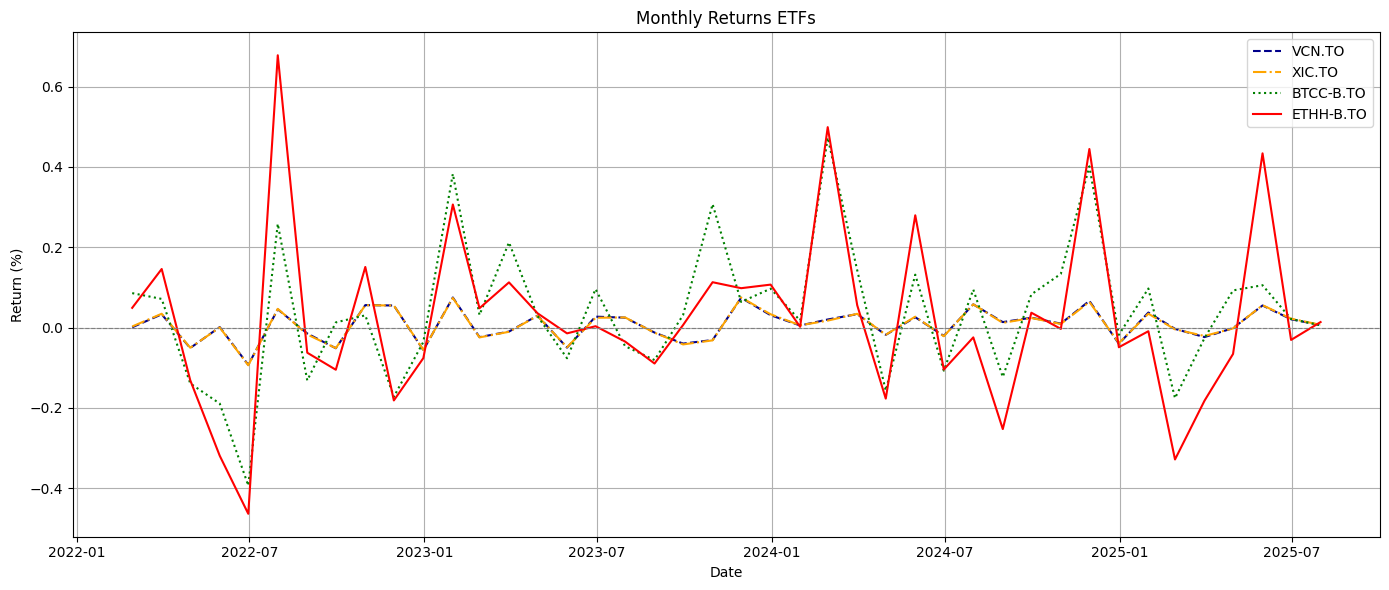

In [24]:
colors = {
    'VCN.TO': 'darkblue',
    'XIC.TO': 'orange',
    'BTCC-B.TO': 'green',
    'ETHH-B.TO': 'red'
}

linestyles = {
    'VCN.TO': '--',
    'XIC.TO': '-.',
    'BTCC-B.TO': ':',
    'ETHH-B.TO': '-'
}

plt.figure(figsize=(14, 6))
for column in monthly_returns.columns:
    color = colors.get(column, None)
    plt.plot(monthly_returns.index, monthly_returns[column], label=column, color=color, linestyle=linestyles.get(column, '-'))

plt.title("Monthly Returns ETFs")
plt.xlabel("Date")
plt.ylabel("Return (%)")
plt.axhline(0, color='gray', linestyle='--', linewidth=0.8)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# 📊 Monthly Returns Analysis

•	**Consistent trends in traditional Equity ETFs** (VCN.TO & XIC.TO):
- Both ETFs demonstrate nearly identical performance patterns.
- Monthly returns remained within a narrow range (typically between -5% and +5%), indicating low volatility.
- Their stability reflects the nature of diversified Canadian stock market exposure.

•	**High Volatility in Cryptocurrency ETFs** (BTCC-B.TO & ETHH-B.TO):
- BTCC-B.TO and ETHH-B.TO show significant price swings, with returns reaching over ±60% in certain months.
- ETHH-B.TO exhibits sharp spikes and drops, highlighting its high-risk, high-reward profile.

•	**Market Behavior & Diversification:**
- The contrast between stable equity ETFs and volatile crypto ETFs underscores the importance of risk management and portfolio diversification.
- Including assets from different risk profiles can help balance overall portfolio performance.


# 2. Calculate Volatility

Volatility helps investors understand the risk associated with an ETF or any investment. A higher volatility means a higher risk because the asset’s price is more unpredictable. Investors use volatility to make decisions about the amount of risk they are willing to take on. It can also help you build a diversified portfolio by balancing assets with different levels of volatility.

In [25]:
# Be sure our index=datetime
monthly_returns.index = pd.to_datetime(monthly_returns.index)

# Create column "year"
monthly_returns['Year'] = monthly_returns.index.year


In [26]:
annual_volatility = (
    monthly_returns
    .groupby('Year')
    .std()*np.sqrt(12)
)
annual_volatility

,VCN.TO,XIC.TO,BTCC-B.TO,ETHH-B.TO
Year,,,,
2022,0.176751,0.177758,0.605623,1.030582
2023,0.145520,0.146207,0.505983,0.352034
2024,0.107562,0.105746,0.670885,0.806943
2025,0.092570,0.090467,0.344011,0.813328


In [27]:
#(reset) = convert year index in a column and (melt) = wide size to a long data frame
df_volatility = annual_volatility.reset_index().melt(
    id_vars='Year',
    var_name='ETF',
    value_name='Annualized Volatility'
)

In [28]:
df_volatility

,Year,ETF,Annualized Volatility
0,2022,VCN.TO,0.176751
1,2023,VCN.TO,0.145520
2,2024,VCN.TO,0.107562
3,2025,VCN.TO,0.092570
4,2022,XIC.TO,0.177758
5,2023,XIC.TO,0.146207
6,2024,XIC.TO,0.105746
7,2025,XIC.TO,0.090467
8,2022,BTCC-B.TO,0.605623
9,2023,BTCC-B.TO,0.505983


<Axes: xlabel='Year', ylabel='Annualized Volatility'>

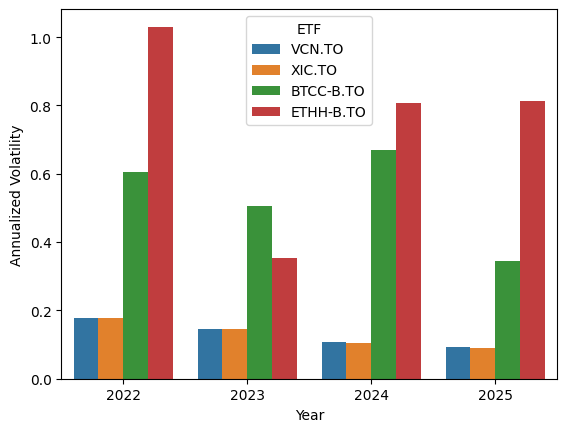

In [29]:
sns.barplot(data=df_volatility, x='Year', y='Annualized Volatility', hue='ETF')

# 📊 Analysis of volatility

•	**VCN.TO & XIC.TO** (Traditional Canadian Equity ETFs)
Trend: Their volatility has consistently decreased each year. Show a clear downward trend in volatility, suggesting growing market stability or lower uncertainty in the Canadian equity space between 2022 and 2025.
Useful insight for conservative investors: The Traditional Canadian ETFs show relatively low risk and increasing stability.

•	**BTCC-B.TO** (Bitcoin ETF)
-	**2022**: 60.56% – High volatility, typical of cryptocurrencies in a bearish year following the 2021 peak.
- **2023**: Decreases to 50.60% – Greater stability, possibly due to lower speculative activity.
-	**2024**: Rises to 67.09% – Indicates a possible new bullish cycle or higher speculation.
- **2025**: Decreases to 34.40% – Could suggest market consolidation or maturation.

•	**ETHH-B.TO** (Ethereum ETF)
- **2022**: 103.06% – Extremely volatile, typical of the crypto market in freefall.
- **2023**: Drops drastically to 35.20% – A sign of stabilization or lower investment volume.
- **2024**: Increases to 80.69% – Possible resurgence of interest in Ethereum.
-	**2025**: Rises further to 81.33% – Shows a market with high speculation or significant price variation.


# 3. Calculate Risk-Adjusted Return

The **Sharpe Ratio** is a widely used measure to evaluate risk-adjusted returns. It shows how much excess return an ETF provides for each unit of risk taken.
A higher Sharpe Ratio indicates a better reward-to-risk profile. This helps identify which ETFs are delivering strong performance relative to their volatility.


In [31]:
monthly_returns.set_index('Year', inplace=True)

In [32]:
print(monthly_returns.columns.tolist())

['VCN.TO', 'XIC.TO', 'BTCC-B.TO', 'ETHH-B.TO']


In [33]:
#compounded annual_return
annual_return = (monthly_returns + 1).groupby('Year').prod() - 1

annual_return

,VCN.TO,XIC.TO,BTCC-B.TO,ETHH-B.TO
Year,,,,
2022,-0.084912,-0.083309,-0.551867,-0.532733
2023,0.088190,0.083090,1.481481,0.866900
2024,0.186516,0.181001,1.365672,0.547842
2025,0.092259,0.093377,0.092534,-0.283636


In [34]:
risk_free_rate = 0.03 # based on the average 1-year Canadian government bond yield in recent years.

sharpe_ratio = (annual_return - risk_free_rate) / annual_volatility

sharpe_ratio

,VCN.TO,XIC.TO,BTCC-B.TO,ETHH-B.TO
Year,,,,
2022,-0.650135,-0.637431,-0.960775,-0.546035
2023,0.399878,0.363115,2.868636,2.377325
2024,1.455126,1.427964,1.990911,0.641734
2025,0.672562,0.700560,0.181779,-0.385621


In [35]:
sharpe_ratio = sharpe_ratio.reset_index()
sharpe_ratio

,Year,VCN.TO,XIC.TO,BTCC-B.TO,ETHH-B.TO
0,2022,-0.650135,-0.637431,-0.960775,-0.546035
1,2023,0.399878,0.363115,2.868636,2.377325
2,2024,1.455126,1.427964,1.990911,0.641734
3,2025,0.672562,0.700560,0.181779,-0.385621


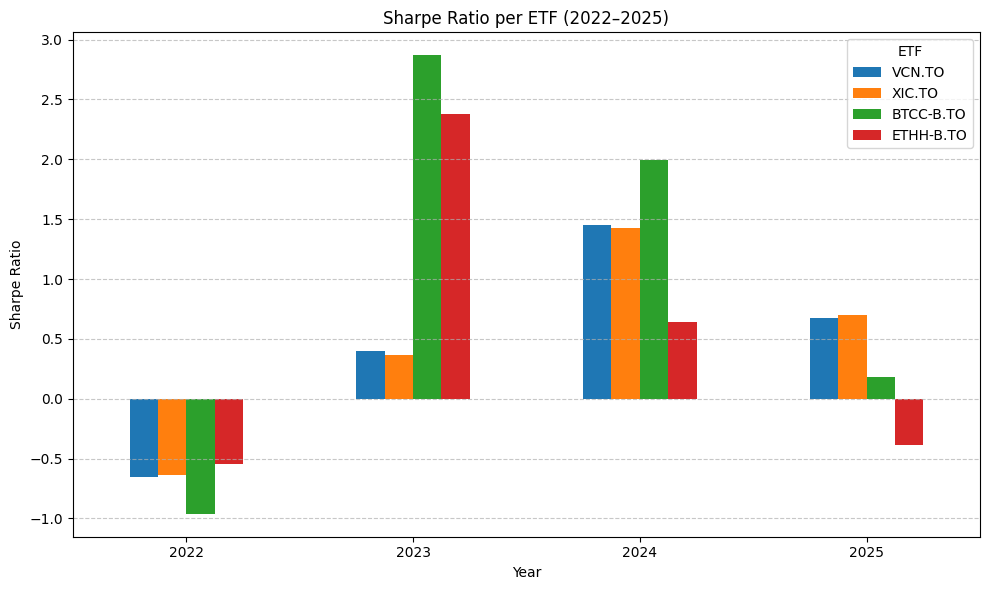

In [36]:
sharpe_ratio.set_index('Year').plot(kind='bar', figsize=(10, 6))
plt.title('Sharpe Ratio per ETF (2022–2025)')
plt.ylabel('Sharpe Ratio')
plt.xlabel('Year')
plt.xticks(rotation=0)
plt.legend(title='ETF')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 📊 Analysis of The Risk-Adjusted Return.

• **VCN.TO & XIC.TO** (Traditional Canadian Equity ETFs)
- Consistent performance, with positive Sharpe Ratios from 2023 onward.
- Ideal for conservative investors, showing stability and low risk-adjusted volatility.

• **BTCC-B.TO** (Bitcoin ETF)
- **2022**: -0.96 – Very poor risk-adjusted performance, expected in a bear market after the 2021 crypto peak.
- **2023**: 2.87 – Excellent return relative to its volatility; indicates strong recovery or market optimism.
- **2024**: 1.99 – Still strong, but slightly less efficient than 2023.
- **2025**: 0.18 – Performance weakened, possibly reflecting market consolidation or lower speculation.

• **ETHH-B.TO** (Ethereum ETF)
- **2022**: -0.55 – High volatility, low returns, typical of a declining crypto market.
- **2023**: 2.38 – Major improvement, reflecting stabilization and renewed interest.
-	**2024**: 0.64 – Still positive, but less efficient than the prior year.
-	**2025**: -0.38 – Return does not compensate for risk, suggesting increased volatility or lack of confidence in the market.


# 4. Calculate maximum drawdown

**Drawdown** represents the percentage decline from the peak value of an investment over time. It measures both the depth and duration of losses.
Overall, drawdown analysis helps investors understand not just how much they can gain, but also how much they might lose—making it an essential tool for building a well-balanced portfolio aligned with risk tolerance.

-	A drawdown of 0% means the asset is at a new all-time high.
-	A negative drawdown (e.g., -20%) indicates that the asset has declined 20% from its previous peak.
-	Deeper drawdowns reflect greater historical losses, suggesting higher volatility and potential emotional stress for investors.
-	Frequent drawdowns or slow recoveries can indicate poor resilience or high sensitivity to market conditions.
-	The worst (most negative) drawdown value in the dataset represents the Maximum Drawdown, a key risk metric that helps investors understand potential downside exposure.



In [37]:
#calculated by taking the percentage change and accumulating it over time (cumprod()="cumulative product")
cumulative_returns = (1 + close_prices.pct_change()).cumprod().dropna()
cumulative_returns.head()

,VCN.TO,XIC.TO,BTCC-B.TO,ETHH-B.TO
Date,,,,
2022-01-05,0.991369,0.991116,0.952874,0.942496
2022-01-06,0.993469,0.992597,0.935632,0.897642
2022-01-07,0.994635,0.992893,0.901149,0.834388
2022-01-10,0.993702,0.992301,0.898851,0.803910
2022-01-11,1.002799,1.002665,0.916092,0.839563


In [40]:
monthly_returns = close_monthly.pct_change().dropna() #(se habia perdido la fecha original)
monthly_returns.head()

,VCN.TO,XIC.TO,BTCC-B.TO,ETHH-B.TO
Date,,,,
2022-02-28,0.000702,0.002678,0.085754,0.049100
2022-03-31,0.032959,0.034421,0.071338,0.145866
2022-04-30,-0.050916,-0.050201,-0.139120,-0.131041
2022-05-31,0.001192,0.000302,-0.189227,-0.319232
2022-06-30,-0.092879,-0.093901,-0.393526,-0.463751


In [41]:
monthly_returns.index = pd.to_datetime(monthly_returns.index)

In [43]:
cumulative_monthly_returns = (1+ monthly_returns).cumprod().dropna()
cumulative_monthly_returns.head()

,VCN.TO,XIC.TO,BTCC-B.TO,ETHH-B.TO
Date,,,,
2022-02-28,1.000702,1.002678,1.085754,1.049100
2022-03-31,1.033684,1.037191,1.163209,1.202128
2022-04-30,0.981053,0.985123,1.001383,1.044599
2022-05-31,0.982222,0.985421,0.811895,0.711129
2022-06-30,0.890994,0.892889,0.492393,0.381342


In [44]:
#cummax()= historic max
rolling_max = cumulative_monthly_returns.cummax()
rolling_max.head()

,VCN.TO,XIC.TO,BTCC-B.TO,ETHH-B.TO
Date,,,,
2022-02-28,1.000702,1.002678,1.085754,1.049100
2022-03-31,1.033684,1.037191,1.163209,1.202128
2022-04-30,1.033684,1.037191,1.163209,1.202128
2022-05-31,1.033684,1.037191,1.163209,1.202128
2022-06-30,1.033684,1.037191,1.163209,1.202128


In [45]:
drawdown = (cumulative_monthly_returns - rolling_max) / rolling_max
drawdown.head()

,VCN.TO,XIC.TO,BTCC-B.TO,ETHH-B.TO
Date,,,,
2022-02-28,0.000000,0.000000,0.000000,0.000000
2022-03-31,0.000000,0.000000,0.000000,0.000000
2022-04-30,-0.050916,-0.050201,-0.139120,-0.131041
2022-05-31,-0.049785,-0.049914,-0.302021,-0.408441
2022-06-30,-0.138040,-0.139128,-0.576694,-0.682777


In [46]:
max_drawdown = drawdown.min() * 100
max_drawdown

,0
VCN.TO,-15.795428
XIC.TO,-15.978197
BTCC-B.TO,-61.474434
ETHH-B.TO,-68.277740


In [47]:
drawdown_dates = drawdown.idxmin()
print(drawdown_dates)

VCN.TO      2022-09-30
XIC.TO      2022-09-30
BTCC-B.TO   2022-12-31
ETHH-B.TO   2022-06-30
dtype: datetime64[ns]


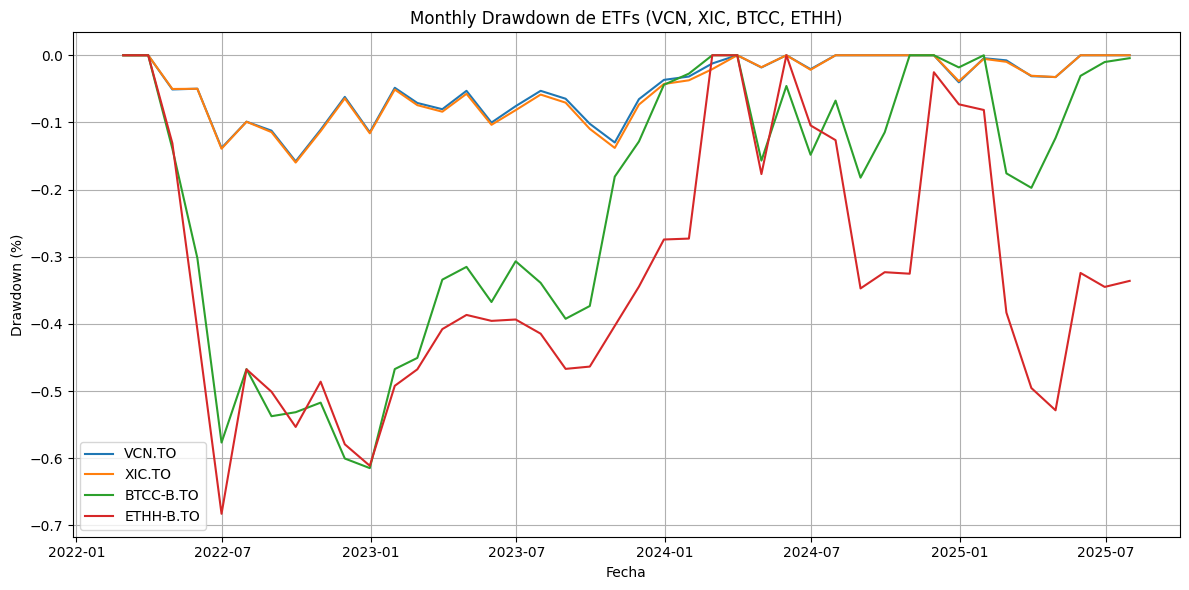

In [48]:
linestyles = {
    'VCN.TO': '--',
    'XIC.TO': '-.',
    'BTCC-B.TO': ':',
    'ETHH-B.TO': '-'
}
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

for col in drawdown.columns:
    plt.plot(drawdown.index, drawdown[col], label=col)

plt.title('Monthly Drawdown de ETFs (VCN, XIC, BTCC, ETHH)')
plt.ylabel('Drawdown (%)')
plt.xlabel('Fecha')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 📊 Analysis of Drawdown

-	**VCN.TO and XIC.TO** (blue and orange) experienced relatively shallow and infrequent drawdowns, rarely exceeding -15%.

-	**BTCC-B.TO** (green) and especially **ETHH-B.TO** (red) underwent multiple deep drawdowns, with ETHH-B.TO reaching a maximum loss of over -60% from its previous peak.
-	This pattern indicates that while crypto ETFs offer potentially high returns, they also come with significantly higher volatility and downside risk. This helps highlight the risk-return tradeoff between traditional and crypto-based investments
- Moreover, their recovery periods tend to be longer and less stable, which might not suit conservative or short-term investors


# 5. Calculate Coefficient of Variation (CV)

The Coefficient of Variation is a statistical measure that shows the ratio of an asset’s standard deviation to its mean return. It helps assess how much risk (volatility) an investor is taking per unit of expected return.
CV allows for comparing the risk-return profiles of different assets.
- A lower CV indicates more efficient returns with less volatility.
- A higher CV suggests greater volatility relative to the average return, and therefore more risk per unit of return.


In [49]:
cv = (monthly_returns.std() / monthly_returns.mean()).sort_values()
cv

,0
BTCC-B.TO,4.337589
VCN.TO,5.743751
XIC.TO,5.872116
ETHH-B.TO,10.141141


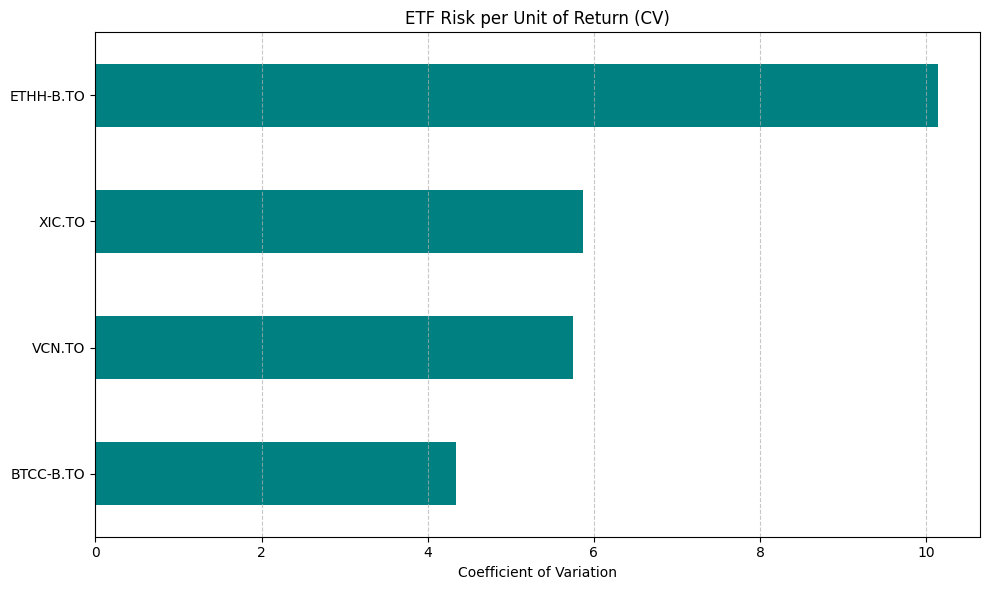

In [50]:
plt.figure(figsize=(10, 6))
cv.plot(kind='barh', color='teal')
plt.xlabel('Coefficient of Variation')
plt.title('ETF Risk per Unit of Return (CV)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 📊 Coefficient of Variation Analysis

According to the Coefficient of Variation (CV) calaculated, **ETHH-B.TO** exhibits the highest relative risk among the four assets analyzed, with a CV more than twice as high as the others. This suggests that despite potential high returns, it carries significantly more volatility per unit of expected return, making it less efficient for risk-averse investors.

# 6. Correlation Between ETFs

**Correlation** is a statistical measure that describes the strength and direction of a linear relationship between two variables. In this case, we measure how similarly two ETFs move relative to each other over time.
Understanding correlation helps in:
-	Diversifying a portfolio: combining assets that do not move together can reduce risk.
-	Assessing overlap: assets that move similarly may offer redundant exposure.
- Highly correlated assets may perform similarly during market shifts, while uncorrelated or negatively correlated assets help stabilize returns.


In [51]:
correlation_matrix = monthly_returns.corr()
correlation_matrix

,VCN.TO,XIC.TO,BTCC-B.TO,ETHH-B.TO
VCN.TO,1.000000,0.999318,0.514201,0.555480
XIC.TO,0.999318,1.000000,0.509470,0.556844
BTCC-B.TO,0.514201,0.509470,1.000000,0.848028
ETHH-B.TO,0.555480,0.556844,0.848028,1.000000


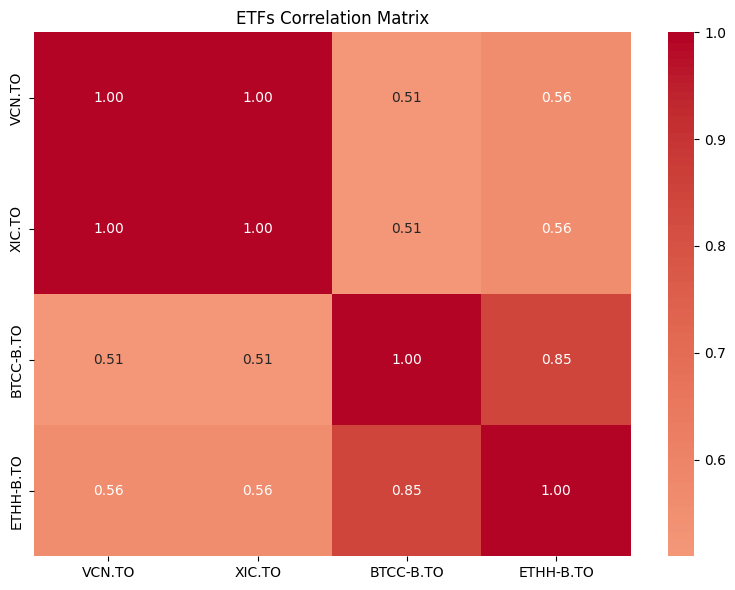

In [52]:
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center = 0, fmt=".2f")
plt.title('ETFs Correlation Matrix')
plt.tight_layout()
plt.show()

# 📊 Correlation Analysis Between ETFs

-	Traditional equity ETFs (**VCN.TO, XIC.TO**) are nearly identical in behavior, almost perfectly correlated. Including both in a portfolio adds little diversification benefit.
-	Crypto ETFs (**BTCC-B.TO, ETHH-B.TO**) are highly correlated with each other. This limits diversification within crypto—holding both doesn't significantly reduce overall portfolio risk.
-	Combining traditional and crypto ETFs offers some level of diversification, as their correlation is moderate, this suggests that while adding cryptocurrencies to a traditional portfolio can enhance diversification, combining Bitcoin and Ethereum ETFs may not significantly reduce risk due to their similar behavior.

# **STEP 5: Model Portfolio Simulation**

To simulate different portfolio strategies using the selected ETFs, we first calculate two key components from the historical monthly returns:

**Mean returns**: the average monthly return for each ETF
→ Used to estimate the portfolio’s expected return based on weight combinations.

**Covariance matrix**: how each ETF’s returns move in relation to the others
→ Used to calculate the portfolio's overall volatility (risk).

These two elements are the foundation for portfolio optimization. we can simulate:

📈 Expected return

📉 Portfolio volatility

📊 Sharpe Ratio (risk-adjusted return)

In [55]:
mean_returns = monthly_returns.mean()
mean_returns


,0
VCN.TO,0.006848
XIC.TO,0.006688
BTCC-B.TO,0.038954
ETHH-B.TO,0.021784


In [56]:
cov_matrix = monthly_returns.cov()
cov_matrix

,VCN.TO,XIC.TO,BTCC-B.TO,ETHH-B.TO
VCN.TO,0.001547,0.001544,0.003417,0.004827
XIC.TO,0.001544,0.001542,0.003381,0.004831
BTCC-B.TO,0.003417,0.003381,0.028549,0.031655
ETHH-B.TO,0.004827,0.004831,0.031655,0.048805


# **💼 Portfolio Composition**
Based on the analysis of key performance indicators (Return, Volatility, Sharpe Ratio, and Max Drawdown), the following model portfolios were proposed to match different investor profiles:

| Portfolio     | Composition                           |
|---------------|---------------------------------------|
| Conservative  | 100% VCN.TO or 100% XIC.TO            |
| Balanced      | 60% VCN.TO, 40% BTCC-B.TO             |
| Growth        | 70% VCN.TO, 30% BTCC-B.TO             |
| Crypto-only   | 50% BTCC-B.TO, 50% ETHH-B.TO          |



In [57]:
portfolio_definitions = {
    "Conservative": {"VCN.TO": 1.0, "XIC.TO": 0.0, "BTCC-B.TO": 0.0, "ETHH-B.TO": 0.0},
    "Balanced": {"VCN.TO": 0.0, "XIC.TO": 0.6, "BTCC-B.TO": 0.4, "ETHH-B.TO": 0.0},
    "Growth": {"VCN.TO": 0.7, "XIC.TO": 0.0, "BTCC-B.TO": 0.0, "ETHH-B.TO": 0.3},
    "Crypto-only": {"VCN.TO": 0.0, "XIC.TO": 0.0, "BTCC-B.TO": 0.5, "ETHH-B.TO": 0.5}
}

summary = []

for name, allocation in portfolio_definitions.items():
    weights = np.array([allocation[ticker] for ticker in monthly_returns.columns])

    port_return = np.sum(weights * mean_returns) * 12
    port_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * 12, weights)))
    sharpe = port_return / port_volatility

    summary.append({
        "Portfolio": name,
        "Return": port_return,
        "Volatility": port_volatility,
        "Sharpe Ratio": sharpe
    })

summary_df = pd.DataFrame(summary)
summary_df


,Portfolio,Return,Volatility,Sharpe Ratio
0,Conservative,0.082174,0.136251,0.603108
1,Balanced,0.235131,0.284517,0.826421
2,Growth,0.135946,0.293484,0.463214
3,Crypto-only,0.364428,0.649609,0.560996


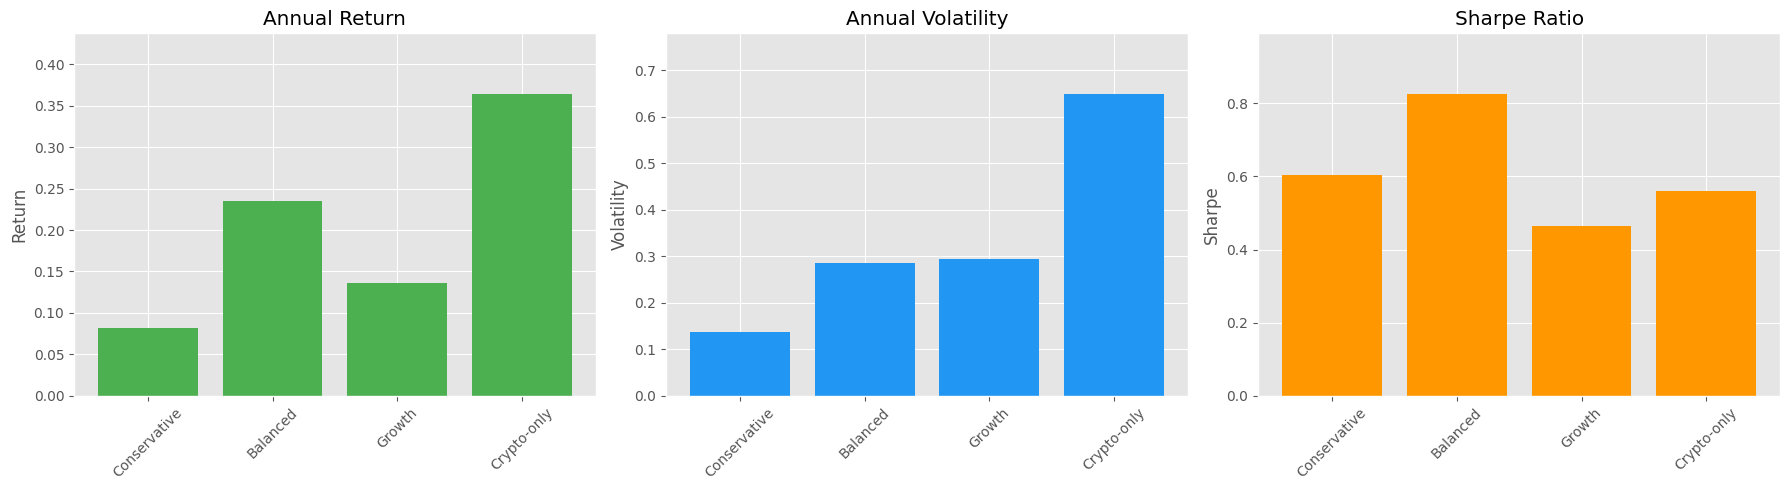

In [63]:
import matplotlib.pyplot as plt

# Set the figure size and style
plt.style.use('ggplot')
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Bar plot: Annual Return
axs[0].bar(summary_df["Portfolio"], summary_df["Return"], color="#4CAF50")
axs[0].set_title("Annual Return")
axs[0].set_ylabel("Return")
axs[0].set_ylim(0, summary_df["Return"].max() * 1.2)
axs[0].tick_params(axis='x', rotation=45)

# Bar plot: Volatility
axs[1].bar(summary_df["Portfolio"], summary_df["Volatility"], color="#2196F3")
axs[1].set_title("Annual Volatility")
axs[1].set_ylabel("Volatility")
axs[1].set_ylim(0, summary_df["Volatility"].max() * 1.2)
axs[1].tick_params(axis='x', rotation=45)

# Bar plot: Sharpe Ratio
axs[2].bar(summary_df["Portfolio"], summary_df["Sharpe Ratio"], color="#FF9800")
axs[2].set_title("Sharpe Ratio")
axs[2].set_ylabel("Sharpe")
axs[2].set_ylim(0, summary_df["Sharpe Ratio"].max() * 1.2)
axs[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


# **Key Insights:**
1.	🟢 **Balanced portfolio** shows the best Sharpe Ratio (0.83), meaning it offers the best return per unit of risk. Best risk-adjusted portfolio
→ This is an efficient mix of traditional and crypto assets (60% XIC, 40% BTCC).
2.	🟡 **Conservative portfolio** has low volatility and a solid Sharpe Ratio (0.60), making it a safer choice for risk-averse investors. Stable, low-risk choice
→ Composed entirely of VCN, it's the most stable.
3.	🔴 **Crypto-only portfolio** achieves the highest return (37%), but with extremely high volatility (65%), resulting in a moderate Sharpe Ratio (0.56). High return + high risk. → High reward potential, but with significant risk.
4.	🟠 **Growth portfolio** (70% VCN + 30% ETHH) has moderate return (14%) but relatively high volatility, yielding a lower Sharpe (0.46).
→ Less efficient than Balanced, despite being designed for higher returns.



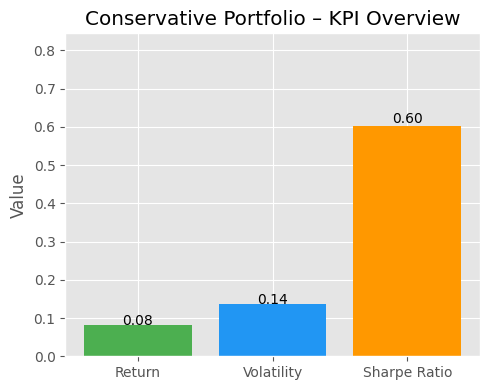

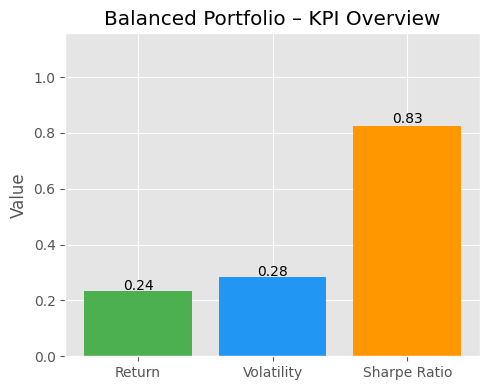

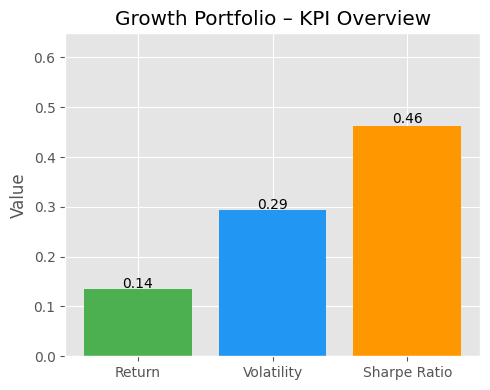

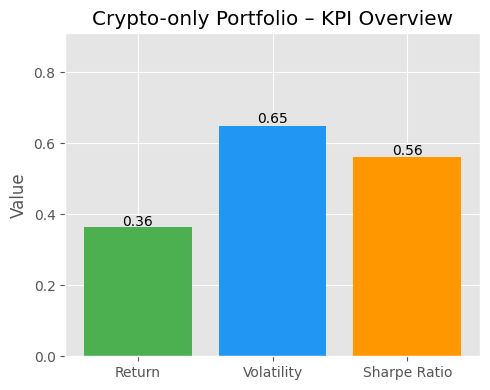

In [64]:
kpis = ["Return", "Volatility", "Sharpe Ratio"]
colors = ['#4CAF50', '#2196F3', '#FF9800']

for idx, row in summary_df.iterrows():
    plt.figure(figsize=(5, 4))
    values = [row[kpi] for kpi in kpis]

    bars = plt.bar(kpis, values, color=colors)
    plt.title(f"{row['Portfolio']} Portfolio – KPI Overview")
    plt.ylabel("Value")

    # Mostrar valores encima de las barras
    for i, bar in enumerate(bars):
        height = bar.get_height()
        plt.text(i, height * 1.01, f"{height:.2f}", ha='center', fontsize=10)

    plt.ylim(0, max(values) * 1.4)
    plt.tight_layout()
    plt.show()


# **Conclusion**
The analysis shows that combining traditional and crypto assets can enhance portfolio efficiency. While a crypto-only portfolio delivers the highest return, it does so with significant volatility. The balanced portfolio, on the other hand, achieves the best risk-adjusted performance, making it a strong candidate for investors seeking both growth and stability.
Crypto ETFs offer diversification but carry significant risk.
Traditional ETFs are more stable but less profitable.
Combining both improves portfolio efficiency.
Balanced portfolios are ideal for moderate-risk investors.
